In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


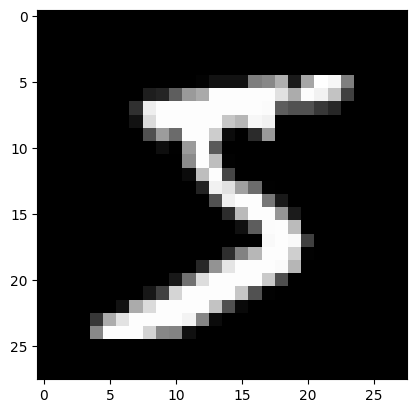

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0], cmap='grey')

In [ ]:
x_train,x_test = x_train/255.0, x_test/255.0

In [ ]:
print('X_train shape:', x_train.shape)

X_train shape: (60000, 28, 28)


# **Modelo**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=x_train[0].shape),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7750 - loss: 0.6643 - val_accuracy: 0.9654 - val_loss: 0.1151
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9634 - loss: 0.1202 - val_accuracy: 0.9698 - val_loss: 0.0991
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9761 - loss: 0.0774 - val_accuracy: 0.9795 - val_loss: 0.0657
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9826 - loss: 0.0584 - val_accuracy: 0.9821 - val_loss: 0.0590
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9866 - loss: 0.0450 - val_accuracy: 0.9825 - val_loss: 0.0600
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9876 - loss: 0.0393 - val_accuracy: 0.9834 - val_loss: 0.0541
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9908 - loss: 0.0318 - val_accuracy: 0.9836 - val_loss: 0.0498
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9921 - loss: 0.0278

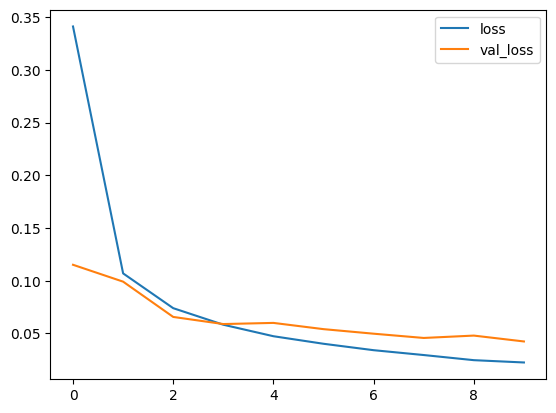

In [ ]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

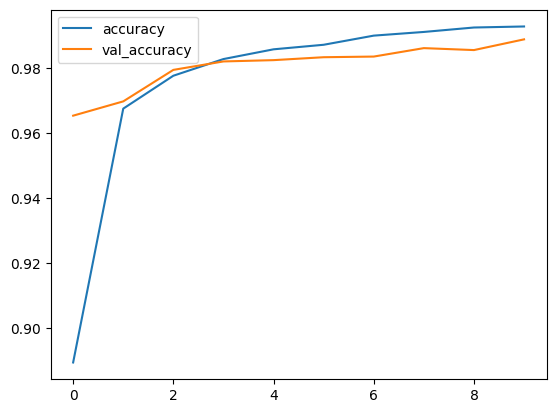

In [ ]:
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# **Predictions**

In [ ]:
import numpy as np

P = model.predict(x_test)
P = np.round(P).flatten()
print(P)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print('Acurácia: ', model.evaluate(x_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9857 - loss: 0.0556
Acurácia:  [0.042447157204151154, 0.9889000058174133]


# **Matriz de confusão**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion matrix, without normalization
[[ 975    0    0    0    1    0    3    1    0    0]
 [   0 1122    3    3    0    1    1    4    1    0]
 [   2    0 1020    1    1    0    0    7    0    1]
 [   0    0    5 1000    0    2    0    2    1    0]
 [   0    0    0    0  972    0    1    1    1    7]
 [   1    0    1    9    0  878    1    1    1    0]
 [   2    3    1    0    1    5  944    0    2    0]
 [   0    1    5    0    0    0    0 1021    0    1]
 [   0    0    4    2    0    7    0    3  953    5]
 [   0    0    0    0    2    1    1    1    0 1004]]


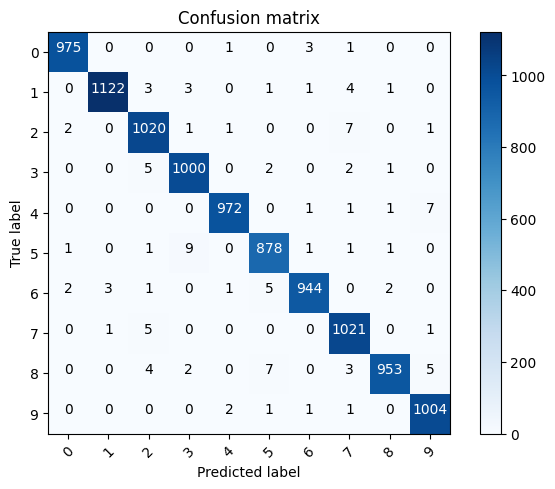

In [ ]:
#Plot confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix'):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 2 Predicted: 7')

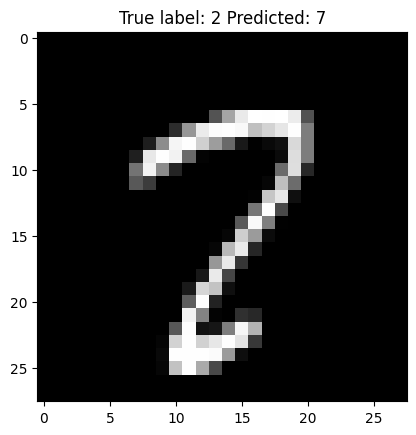

In [ ]:
#Show misdisclassified samples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))